# CAPSTONE 
## Data Exploration for the MRI Brain Tumor Classifier
### By: Bilal Munir

The objective of this project is to build a model that can classify a Brain MRI as having a tumor or not. And if it does have a tumor, which one does it have? Kaggle showed 44 different classes of tumors.

In [1]:
# Importing all the Necessary Libraries
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# SKLEARN Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import glob
import zipfile

Unzipping the image data archive with glob and zipfile

In [5]:
files = glob.glob('archive.zip')
files

['archive.zip']

In [6]:
for file in files:
    print('Unzipping:', file)
    
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('data/raw')

Unzipping: archive.zip


Loading the First Image Ever to see how it looks. First as a numpy.

In [7]:
one_img = np.asarray(Image.open('data/raw/_NORMAL T1/0a0bc6879f5d5d14c4df229b64b801_big_gallery.jpeg'))
print(repr(one_img))

array([[4, 4, 4, ..., 4, 4, 3],
       [4, 4, 4, ..., 4, 4, 3],
       [4, 4, 4, ..., 4, 4, 3],
       ...,
       [4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 2]], dtype=uint8)


Plotting the first image using plt.imshow()

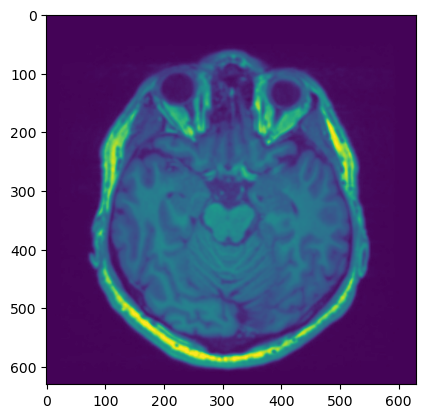

In [8]:
imgplot = plt.imshow(one_img)

The plot gives this purplish/Greenish hue and not the black and white format that I was initially expecting.

I learned that in order to view this image in the gray scale format that I desire, I would have to adjust the parameters of the *plt.imshow()* function like so,

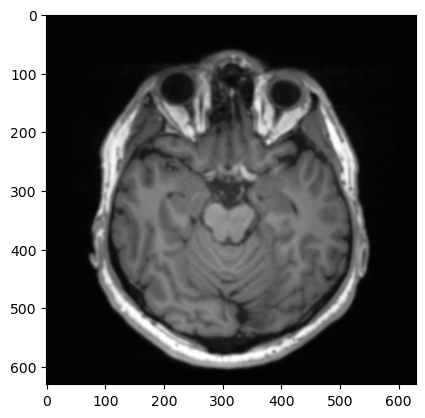

In [9]:
imgplot = plt.imshow(255 - one_img, cmap='Greys')

In [10]:
one_img.shape

(630, 630)

In order to explore this dataset we will need to utilize the **os library**. It will help us retrieve the file paths for each image.

In [11]:
# Importing the os library
import os

In [12]:
# Displaying the different classes of images
Category_List = os.listdir('data/raw')
Category_List

['Ependimoma T1',
 'Meduloblastoma T2',
 'Meduloblastoma T1C+',
 'Meduloblastoma T1',
 'Schwannoma T2',
 'Ganglioglioma T1',
 'Neurocitoma T1',
 'Meningioma T1C+',
 'Glioblastoma T1C+',
 'Papiloma T1',
 'Oligodendroglioma T1',
 'Ganglioglioma T2',
 'Papiloma T1C+',
 'Astrocitoma T1C+',
 'Germinoma T2',
 'Tuberculoma T1',
 'Schwannoma T1',
 'Germinoma T1C+',
 'Ependimoma T2',
 'Meningioma T1',
 'Granuloma T2',
 'Glioblastoma T2',
 'Astrocitoma T2',
 'Oligodendroglioma T2',
 'Carcinoma T2',
 'Ganglioglioma T1C+',
 'Neurocitoma T2',
 '_NORMAL T2',
 'Meningioma T2',
 'Schwannoma T1C+',
 'Neurocitoma T1C+',
 'Astrocitoma T1',
 'Tuberculoma T2',
 'Papiloma T2',
 'Granuloma T1',
 'Tuberculoma T1C+',
 'Oligodendroglioma T1C+',
 'Carcinoma T1C+',
 'Ependimoma T1C+',
 'Germinoma T1',
 '_NORMAL T1',
 'Carcinoma T1',
 'Glioblastoma T1',
 'Granuloma T1C+']

Here we see the displayed classes of folders which contains **14 different classes of tumors**, Astrocitoma, Carcinoma, Ependimoma etc.

We notice that each class of Tumor is divided into 3 separate sections (T1, T1C+ and T2). These are MRI weightings which highlight different parts of the brain. T1 weighted images are able to highlight areas with subcutaneous fat

In [13]:
type(Category_List)

list

In [14]:
# Displaying the number of classes
len(Category_List)

44

In [15]:
# Number of images per class folder.
Num_Images = []
for category in Category_List:
    num_files = len(os.listdir(f'data/raw/{category}'))
    Num_Images.append(num_files)
    
Num_Images

[45,
 41,
 67,
 23,
 123,
 20,
 130,
 369,
 94,
 66,
 86,
 23,
 108,
 233,
 33,
 28,
 148,
 40,
 57,
 272,
 17,
 55,
 171,
 66,
 73,
 18,
 104,
 271,
 233,
 194,
 223,
 176,
 33,
 63,
 30,
 84,
 72,
 112,
 48,
 27,
 251,
 66,
 55,
 31]

In [16]:
# Total number of images
sum(Num_Images)

4479

Plotting a simple bar graph showcasing the amount of images per class

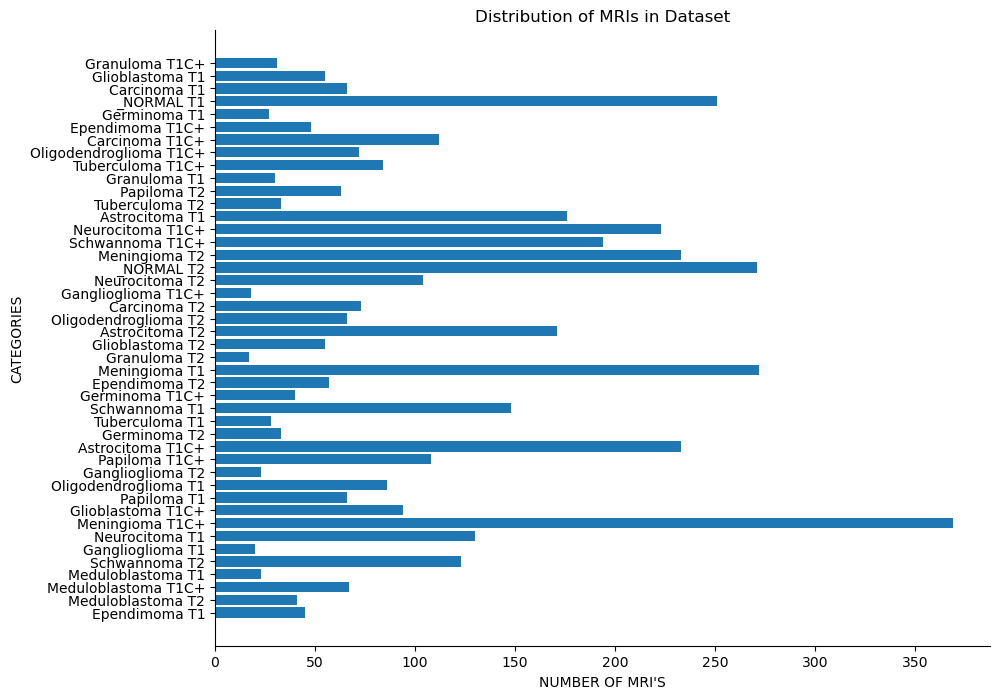

In [17]:
plt.figure(figsize=(10,8))
plt.barh(Category_List, Num_Images)

plt.title('Distribution of MRIs in Dataset')
plt.xlabel("NUMBER OF MRI'S")
plt.ylabel('CATEGORIES')

sns.despine()
plt.show()

Creating a dictionary that attaches individual images to their respective Classes. For example, all the 

In [18]:
file_paths = {}
for category in Category_List:
    file_paths[category] = []
    for file in os.listdir(f'data/raw/{category}'):
       # print(f'data/raw/{category}/{file}')
        
        file_paths[category].append(f'data/raw/{category}/{file}')
file_paths

{'Ependimoma T1': ['data/raw/Ependimoma T1/cf44f513abeffbc2f6160683e6eb3e_big_gallery.jpg',
  'data/raw/Ependimoma T1/1cfa9b2b86c400725560e99cac999a_big_gallery.jpeg',
  'data/raw/Ependimoma T1/759770af73daedf887196ebb927aaf_big_gallery.jpeg',
  'data/raw/Ependimoma T1/278eb43ad45f8cff2f170e26d4ed81_big_gallery.jpeg',
  'data/raw/Ependimoma T1/a2f5d4e5b3fd9704438dcc7969c853_big_gallery.jpeg',
  'data/raw/Ependimoma T1/ad7a8a5eeaf2fe1be6577ef68023e2_big_gallery.jpeg',
  'data/raw/Ependimoma T1/2a38810d90ee55020472c448f57222_big_gallery.jpg',
  'data/raw/Ependimoma T1/277f204c096833b5d9c213ad349c71_big_gallery.jpg',
  'data/raw/Ependimoma T1/9c445e2866345c299517f07c513ad4_big_gallery.jpeg',
  'data/raw/Ependimoma T1/147357401b350b62c231a1796e0dc4_big_gallery.jpg',
  'data/raw/Ependimoma T1/a70075686267a2266269483abc3dec_big_gallery.jpeg',
  'data/raw/Ependimoma T1/56fb2fe76cbfea437072c8a655c5ef_big_gallery.jpeg',
  'data/raw/Ependimoma T1/57a73d21e12fef21a1a68910dc7c0d_big_gallery.jpeg',

In [19]:
imgs = []
classification = []
file_names = []
for key, item in file_paths.items():
    
    for file_name in item:
        print(key, file_name)
        
        # Opening the images
        img = Image.open(file_name)
        
        # Resizing the images to 500X500
        img = img.resize((500, 500))
        
        # Converting images to grey scale
        img = img.convert(mode='L')
        
        # Loading the normalized image
        load_img = np.asarray(img)
        
        # then append grey images
        file_names.append(file_name)
        imgs.append(load_img)
        classification.append(key)

Ependimoma T1 data/raw/Ependimoma T1/cf44f513abeffbc2f6160683e6eb3e_big_gallery.jpg
Ependimoma T1 data/raw/Ependimoma T1/1cfa9b2b86c400725560e99cac999a_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/759770af73daedf887196ebb927aaf_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/278eb43ad45f8cff2f170e26d4ed81_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/a2f5d4e5b3fd9704438dcc7969c853_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/ad7a8a5eeaf2fe1be6577ef68023e2_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/2a38810d90ee55020472c448f57222_big_gallery.jpg
Ependimoma T1 data/raw/Ependimoma T1/277f204c096833b5d9c213ad349c71_big_gallery.jpg
Ependimoma T1 data/raw/Ependimoma T1/9c445e2866345c299517f07c513ad4_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/147357401b350b62c231a1796e0dc4_big_gallery.jpg
Ependimoma T1 data/raw/Ependimoma T1/a70075686267a2266269483abc3dec_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/56fb2fe76cbfea437072c8a655c5ef_b

In [20]:
# Total images
print(f"There are a total of {len(imgs)} images in the dataset.")

There are a total of 4479 images in the dataset.


Sanity Check to see if the shapes were reduced to 500 x 500

In [21]:
shapes = []
for i in range(len(imgs)):
    shapes.append(imgs[i].shape)

In [22]:
shapes

[(500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),
 (500, 500),

In [23]:
len(shapes)

4479

In [24]:
len(classification)

4479

In [25]:
classification

['Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Ependimoma T1',
 'Meduloblastoma T2',
 'Meduloblastoma T2',
 'Meduloblastoma T2',
 'Meduloblastoma T2',
 'Meduloblastoma T2',
 'Meduloblastoma T2',
 'Meduloblastoma T2',
 'Meduloblastoma T2',
 'Meduloblasto

In [26]:
len(file_paths['Astrocitoma T1'])

176

In [27]:
# dictionary of lists 
dict = {'Tumor_Class': classification, 'file_path': file_names, 'Shapes': shapes} 

In [28]:
Tumors_df = pd.DataFrame(dict)
Tumors_df.head()

Tumor_Class                                          file_path   
0  Ependimoma T1  data/raw/Ependimoma T1/cf44f513abeffbc2f616068...  \
1  Ependimoma T1  data/raw/Ependimoma T1/1cfa9b2b86c400725560e99...   
2  Ependimoma T1  data/raw/Ependimoma T1/759770af73daedf887196eb...   
3  Ependimoma T1  data/raw/Ependimoma T1/278eb43ad45f8cff2f170e2...   
4  Ependimoma T1  data/raw/Ependimoma T1/a2f5d4e5b3fd9704438dcc7...   

       Shapes  
0  (500, 500)  
1  (500, 500)  
2  (500, 500)  
3  (500, 500)  
4  (500, 500)

In [29]:
Tumors_df['Shapes'].value_counts()

Shapes
(500, 500)    4479
Name: count, dtype: int64

Now we know for sure that the all the images have been reduced to 500 x 500, We no longer need the shapes column

In [30]:
Tumors_df = Tumors_df.drop('Shapes', axis=1)
Tumors_df.head()

Tumor_Class                                          file_path
0  Ependimoma T1  data/raw/Ependimoma T1/cf44f513abeffbc2f616068...
1  Ependimoma T1  data/raw/Ependimoma T1/1cfa9b2b86c400725560e99...
2  Ependimoma T1  data/raw/Ependimoma T1/759770af73daedf887196eb...
3  Ependimoma T1  data/raw/Ependimoma T1/278eb43ad45f8cff2f170e2...
4  Ependimoma T1  data/raw/Ependimoma T1/a2f5d4e5b3fd9704438dcc7...

## Preparation for Modelling

Adding an extra boolean column which indicates whether an MRI has a tumor in it or not

In [31]:
Tumors_df['Tumor_Presence'] = np.where(Tumors_df['Tumor_Class'].str.contains('NORMAL'), 0, 1)

In [32]:
Tumors_df.head()

Tumor_Class                                          file_path   
0  Ependimoma T1  data/raw/Ependimoma T1/cf44f513abeffbc2f616068...  \
1  Ependimoma T1  data/raw/Ependimoma T1/1cfa9b2b86c400725560e99...   
2  Ependimoma T1  data/raw/Ependimoma T1/759770af73daedf887196eb...   
3  Ependimoma T1  data/raw/Ependimoma T1/278eb43ad45f8cff2f170e2...   
4  Ependimoma T1  data/raw/Ependimoma T1/a2f5d4e5b3fd9704438dcc7...   

   Tumor_Presence  
0               1  
1               1  
2               1  
3               1  
4               1

In [33]:
Tumors_df.loc[Tumors_df['Tumor_Class'].str.contains('NORMAL')]

Tumor_Class                                          file_path   
2510  _NORMAL T2  data/raw/_NORMAL T2/f1eda9941bacc5ddf135c18862...  \
2511  _NORMAL T2  data/raw/_NORMAL T2/ba29d24104918a30130f4003fa...   
2512  _NORMAL T2  data/raw/_NORMAL T2/06a1f57d06f00851926e9d19c0...   
2513  _NORMAL T2  data/raw/_NORMAL T2/6f63bec9d3b8ebb46401667f61...   
2514  _NORMAL T2  data/raw/_NORMAL T2/39918895cb4e8adb76404cb6a8...   
...          ...                                                ...   
4322  _NORMAL T1  data/raw/_NORMAL T1/2022-06-13 09_37_55-Normal...   
4323  _NORMAL T1  data/raw/_NORMAL T1/69e42b195b1d799c8c8d34dc67...   
4324  _NORMAL T1  data/raw/_NORMAL T1/2022-06-13 09_37_42-Normal...   
4325  _NORMAL T1  data/raw/_NORMAL T1/1a5541b8015fd46f1e71a4a6a1...   
4326  _NORMAL T1  data/raw/_NORMAL T1/5e9cd5dd601cdb23c833d49720...   

      Tumor_Presence  
2510               0  
2511               0  
2512               0  
2513               0  
2514               0  
...              ...  
4322               0  
4323               0  
4324               0  
4325               0  
4326               0  

[522 rows x 3 columns]

A total of 522 MRIs which have no tumor.

In [34]:
# Additional Sanity Check to confirm abv statement
Tumors_df['Tumor_Presence'].value_counts(normalize=True)

Tumor_Presence
1    0.883456
0    0.116544
Name: proportion, dtype: float64

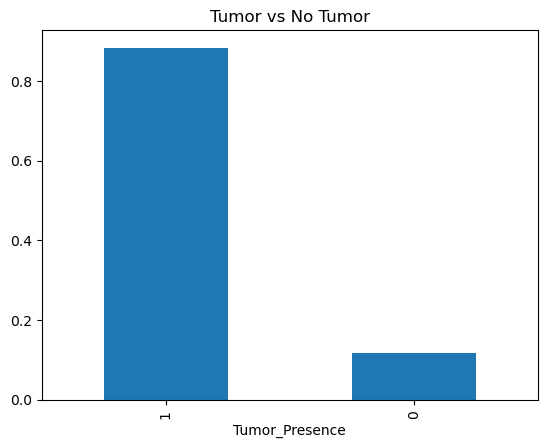

In [35]:
# Additional Sanity Check to confirm abv statement
plt.figure()
Tumors_df['Tumor_Presence'].value_counts(normalize=True).plot(kind='bar')
plt.title('Tumor vs No Tumor')
plt.show()

**Having a Look at how the gray scale images were normalized.**

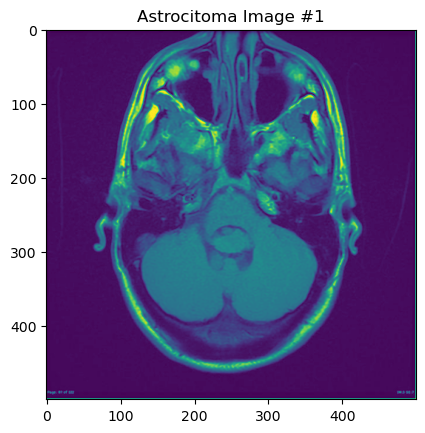

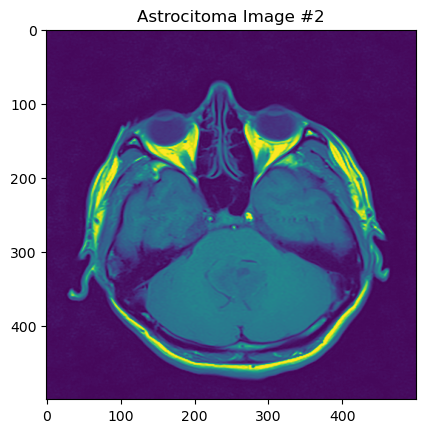

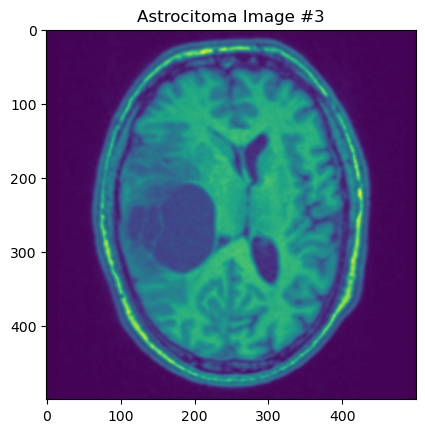

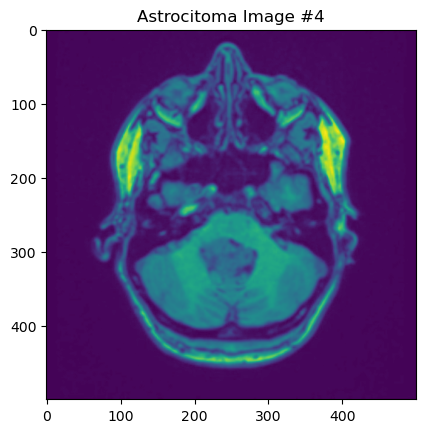

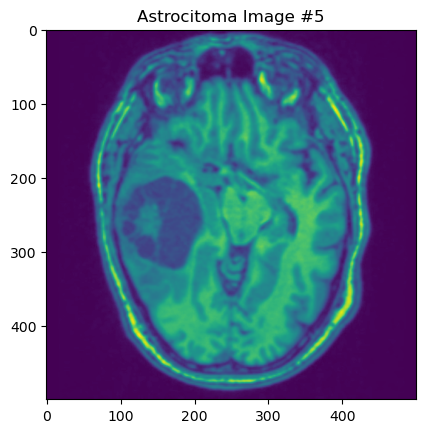

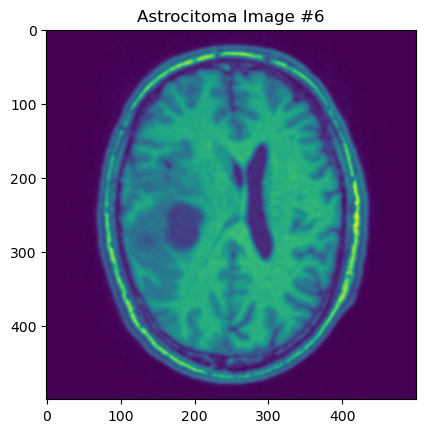

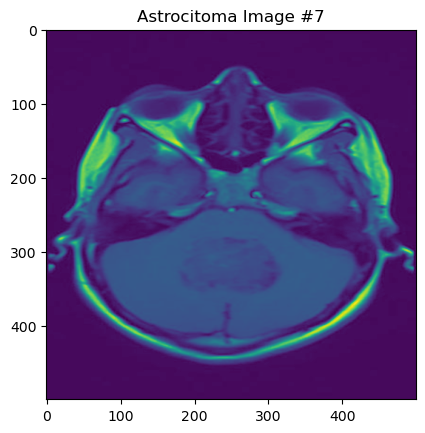

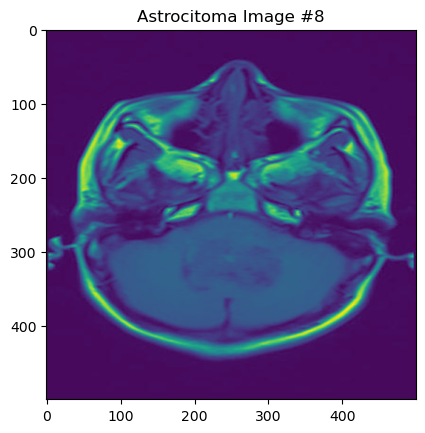

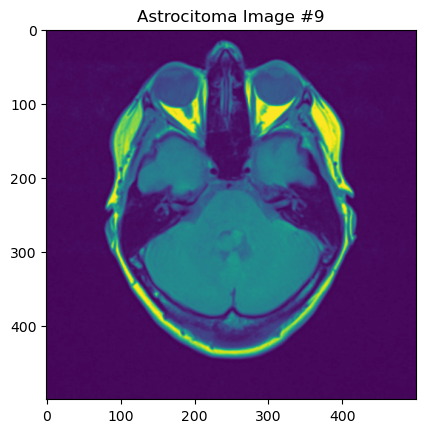

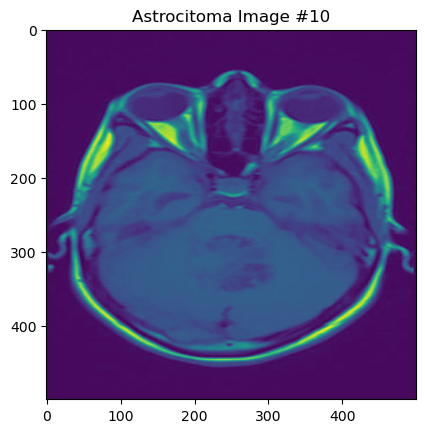

In [36]:
for i in range(10):
    plt.figure()
    plt.title(f"Astrocitoma Image #{i+1}")
    plt.imshow(imgs[i])
    plt.show()

Stacking all the numpy images on top of each other

In [37]:
stacked_images = np.stack(imgs, axis=0)

In [38]:
stacked_images

array([[[210,  77,  89, ...,  91,  80, 213],
        [177,   0,   0, ...,   0,   2, 175],
        [185,   0,   0, ...,   1,   0, 180],
        ...,
        [185,   1,   0, ...,   2,   5, 180],
        [178,   7,   5, ...,   3,   9, 174],
        [228, 173, 184, ..., 176, 171, 232]],

       [[ 10,  10,  10, ...,  10,  10,  10],
        [ 10,  10,  11, ...,  13,  12,  12],
        [ 10,  11,  13, ...,  18,  16,  14],
        ...,
        [ 10,  11,  13, ...,  14,  13,  12],
        [  9,  11,  14, ...,  13,  12,  11],
        [  9,  11,  14, ...,  14,  13,  12]],

       [[  1,   1,   1, ...,   1,   0,   0],
        [  1,   1,   1, ...,   1,   0,   0],
        [  1,   1,   1, ...,   1,   0,   0],
        ...,
        [  1,   1,   1, ...,   2,   1,   1],
        [  1,   1,   1, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  3,   3,   3, ...,   3,   2,   1],
        [  3,   3,   3, ...,   3,   2,   2],
        [  3,   3,   3, ...,   4,   4,   4

In [39]:
mean = stacked_images.mean(axis=0)

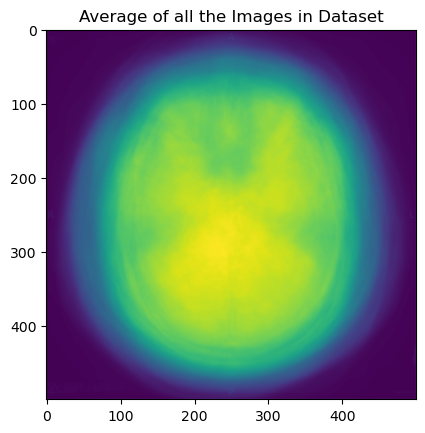

In [40]:
plt.figure()
plt.imshow(mean)
plt.title('Average of all the Images in Dataset')
plt.show()

In [41]:
# NORMAL Mean
NORMAL_Mean = stacked_images[3957:4479].mean(axis=0)

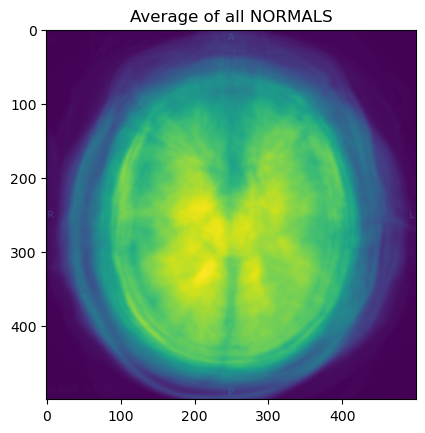

In [42]:
plt.figure()
plt.imshow(NORMAL_Mean)
plt.title('Average of all NORMALS')
plt.show()

In [43]:
# Astrocitoma Mean
Astrocitoma_Mean = stacked_images[:580].mean(axis=0)

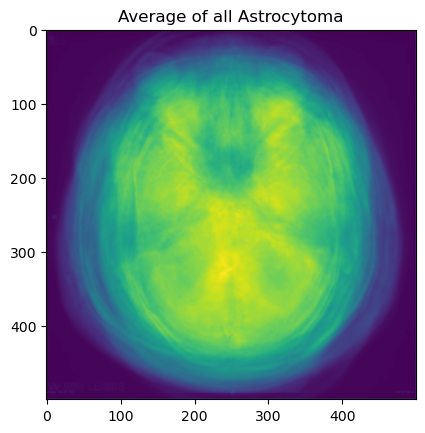

In [44]:
plt.figure()
plt.imshow(Astrocitoma_Mean)
plt.title('Average of all Astrocytoma')
plt.show()

In [45]:
# Meningioma Mean
Meningioma_Mean = stacked_images[1555:2429].mean(axis=0)

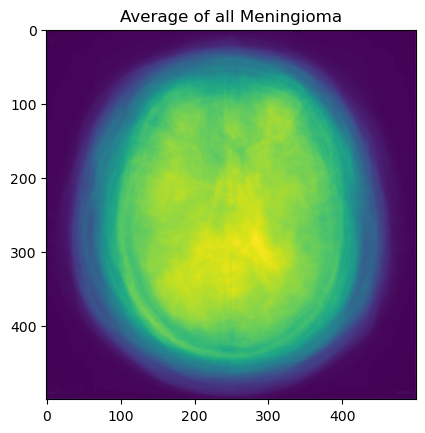

In [46]:
plt.figure()
plt.imshow(Meningioma_Mean)
plt.title('Average of all Meningioma')
plt.show()

In [47]:
X = stacked_images.reshape(-1, 500*500)

In [48]:
y = Tumors_df['Tumor_Presence']

### Gameplan for modelling:
#### - Train test Split
#### - Set up pipeline with PCA
#### - Try out different classification models. (Logreg & XG-Boost(D-Trees))
K-best, evaluation, CNNs

In [49]:
from sklearn.pipeline import Pipeline

#we give our estimators as a list of tuples: name:function.
estimators = [('reduce_dim', PCA(n_components=0.8)), # finds 80% of the variance
              ('Model', LogisticRegression())]

pipe = Pipeline(estimators)

SyntaxError: invalid syntax (2301108008.py, line 4)

In [46]:
# Feature Selection K-Best
from sklearn.pipeline import Pipeline

#we give our estimators as a list of tuples: name:function.
estimators = [('reduce_dim', PCA(n_components=300)),
              ('Model', LogisticRegression(C=0.001))]

pipe = Pipeline(estimators)

In [52]:
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=24)


In [60]:
# Instantiating the Logreg model
logreg = LogisticRegression(max_iter=500)

# Fitting the model
results = logreg.fit(X_train, y_train)

# Getting the train and validation accuracies
logreg_train_acc = logreg.score(X_train, y_train)
logreg_val_acc = logreg.score(X_val, y_val)

print(f"Train accuracy: {round(logreg_train_acc, 4)}")   
print(f"Val accuracy: {round(logreg_val_acc, 4)}")

Train accuracy: 1.0
Val accuracy: 0.9554


In [61]:
logreg.n_iter_

array([436], dtype=int32)

In [62]:
y_preds = results.predict(X_val)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [65]:
from sklearn.metrics import classification_report

target_names = ['No Tumor', 'Tumor']
print(classification_report(y_val, y_preds, target_names=target_names))

              precision    recall  f1-score   support

    No Tumor       0.86      0.77      0.81       113
       Tumor       0.97      0.98      0.97       783

    accuracy                           0.96       896
   macro avg       0.91      0.88      0.89       896
weighted avg       0.95      0.96      0.95       896



In [69]:
logreg.coef_

array([[ 2.60093959e-05, -1.40510026e-05, -7.34336516e-06, ...,
         4.70723570e-05,  6.32601829e-05,  8.22338625e-05]])

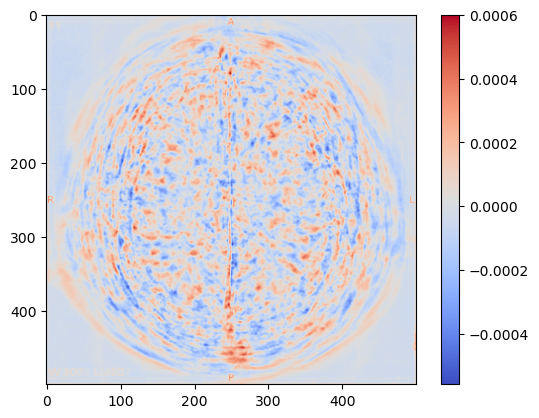

In [73]:
plt.figure()
plt.imshow(logreg.coef_.reshape(500, 500), cmap='coolwarm')
plt.colorbar()
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=0.0001 completed


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=0.001 completed


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=0.01 completed
C=10 completed
C=100 completed
C=1000 completed


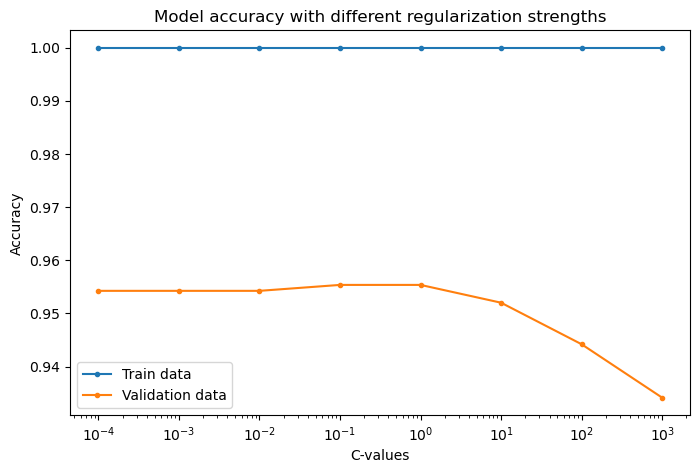

In [ ]:
# range of c-values
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# train/val accuracy lists
train_acc = []
val_acc = []

# loop model iterations across all C-values
for c in c_values:
    logit_C = LogisticRegression(max_iter=10000, C=c).fit(X_train, y_train)
    train_acc.append(logit_C.score(X_train, y_train))
    val_acc.append(logit_C.score(X_val, y_val))
    print(f"C={c} completed")

# plot out train/val accuracies
plt.figure(figsize=(8,5))
plt.plot(c_values, train_acc, marker='.', label='Train data')
plt.plot(c_values, val_acc, marker='.', label='Validation data')
plt.xscale('log')
plt.xlabel('C-values')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model accuracy with different regularization strengths')
plt.show()

In [ ]:
Confusion Matrix 

In [ ]:
X.reshape(-1, 500, 500, 1)